# Import Python modules

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import torch
import numpy as np
import tqdm
import utils
import networks
from dataloader import ImageDataloader

# Load processed data

In [2]:
data_dict = torch.load('data/image_csv_processed.pt')
image_dict = torch.load('data/images_processed.pt')

# Fit data to linear regression model

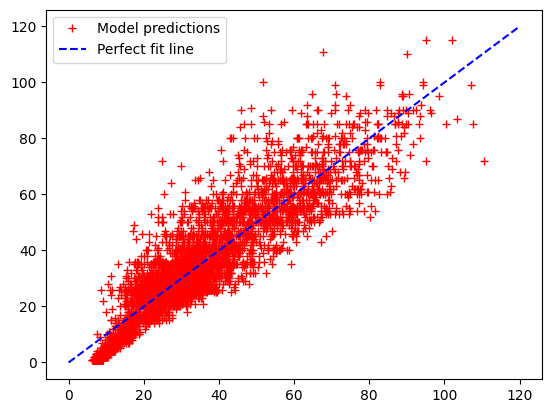

In [3]:
model = LinearRegression()

x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_val = data_dict['x_val']
y_val = data_dict['y_val']

model = model.fit(x_train, y_train)

pred = model.predict(x_val)

plt.plot(pred, y_val, 'r+', label='Model predictions')
plt.plot([0, 120], [0, 120], 'b--', label='Perfect fit line')
plt.legend()

# Train images only with a CNN

In [8]:
image_dict = torch.load('data/images_processed.pt')

x_train = image_dict['x_train_image']
x_val = image_dict['x_val_image']

image_batch_size = 32

train_dataloader = ImageDataloader(x = x_train, y = y_train, batch_size=image_batch_size, randomize=True)
val_dataloader = ImageDataloader(x = x_val, y = y_val, batch_size=image_batch_size, randomize=False)

model = networks.CNNRegression()

# instantiate your optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# log your losses
train_losses = []
val_losses = []

# define how many epochs to train on
epochs = 30

# define your loss function for multiclass classification task
# BCE does binary cross entropy automatically for each class
loss_fn = torch.nn.MSELoss(reduction='none')

for _ in tqdm.tqdm(range(epochs)):
    losses = []
    for _ in range(train_dataloader.num_batches_per_epoch):
        # training data forward pass
        optimizer.zero_grad()
        train_batch = train_dataloader.fetch_batch()
        yhat = model(train_batch['x_batch'])
        print(yhat.shape)
        print(yhat)
        break
        train_loss = torch.mean(loss_fn(yhat, train_batch['y_batch']), dim=0)

        # training data backward pass
        train_loss.backward()
        optimizer.step()
        losses.append(train_loss.detach().numpy())

    # personally, I like to visualize the loss per every iteration, rather than every epoch. I find it more useful to diagnose issues
    train_losses.extend(losses)
    
    losses = []
    for _ in range(val_dataloader.num_batches_per_epoch):
        # validation data forward pass only
        val_batch = val_dataloader.fetch_batch()
        yhat = model(val_batch['x_batch'])
        val_loss = torch.mean(loss_fn(yhat, val_batch['y_batch']), dim=0)
        losses.append(val_loss.detach().numpy())
    # epoch-level logging for validation though usually makes the most sense
    val_losses.append(np.mean(losses))

  0%|          | 0/30 [00:00<?, ?it/s]

torch.Size([32, 1])
tensor([[-11.6890],
        [ -5.7376],
        [ -8.5567],
        [ -7.6371],
        [ -4.9777],
        [-15.8872],
        [-14.1908],
        [-13.3838],
        [-11.5871],
        [ -8.1201],
        [ -7.7060],
        [ -7.4326],
        [-10.3407],
        [ -7.9079],
        [-11.3344],
        [-10.0079],
        [ -4.9958],
        [ -7.6094],
        [ -8.1745],
        [ -7.4188],
        [-10.4259],
        [ -5.8383],
        [-10.4121],
        [ -8.8020],
        [ -3.7529],
        [ -6.9641],
        [ -8.1814],
        [-12.5444],
        [-10.1192],
        [ -6.2223],
        [-11.3647],
        [ -3.7281]], grad_fn=<AddmmBackward0>)


  3%|▎         | 1/30 [00:00<00:23,  1.26it/s]

torch.Size([32, 1])
tensor([[ -8.5833],
        [-10.1211],
        [-10.2555],
        [ -7.3508],
        [ -8.0664],
        [ -6.4703],
        [ -5.7986],
        [ -9.7119],
        [-10.0486],
        [-10.7826],
        [ -9.5311],
        [ -9.8374],
        [ -7.0549],
        [ -3.6290],
        [-12.9338],
        [-10.2026],
        [ -9.8897],
        [-10.3843],
        [ -9.9865],
        [ -7.0898],
        [ -9.0560],
        [ -9.1230],
        [ -9.6806],
        [-10.9952],
        [ -8.5455],
        [ -9.3970],
        [-12.3361],
        [-11.7359],
        [ -7.8376],
        [ -9.2848],
        [ -5.4491],
        [ -9.9046]], grad_fn=<AddmmBackward0>)


  7%|▋         | 2/30 [00:01<00:17,  1.57it/s]

torch.Size([32, 1])
tensor([[-13.4802],
        [ -4.9945],
        [-12.0514],
        [-16.5301],
        [ -8.3874],
        [ -7.2409],
        [ -7.1638],
        [-20.1023],
        [-12.9775],
        [-10.7699],
        [ -6.8640],
        [ -5.7062],
        [-11.3304],
        [-11.3345],
        [ -5.5092],
        [ -8.2437],
        [ -7.9842],
        [ -5.4769],
        [ -5.5538],
        [-10.1090],
        [ -9.5813],
        [ -6.9862],
        [ -9.3001],
        [ -9.6357],
        [-11.2148],
        [ -8.1102],
        [-10.3747],
        [ -6.6268],
        [-12.7588],
        [-13.6541],
        [ -8.2322],
        [ -2.9487]], grad_fn=<AddmmBackward0>)


 10%|█         | 3/30 [00:01<00:15,  1.69it/s]

torch.Size([32, 1])
tensor([[-11.5180],
        [ -5.1187],
        [-11.0921],
        [-13.3186],
        [ -6.7447],
        [ -9.9576],
        [-16.2885],
        [-13.0224],
        [ -7.6907],
        [ -7.6331],
        [-12.0348],
        [-13.1904],
        [ -9.3683],
        [ -5.6164],
        [ -8.1074],
        [ -5.7255],
        [ -4.9375],
        [ -6.2830],
        [-10.2595],
        [ -4.4983],
        [ -9.7851],
        [-11.0596],
        [ -7.5520],
        [ -5.6611],
        [ -9.3700],
        [ -4.6552],
        [ -7.2307],
        [-11.2946],
        [-12.4759],
        [ -6.1123],
        [ -3.1829],
        [-13.8631]], grad_fn=<AddmmBackward0>)


 13%|█▎        | 4/30 [00:02<00:14,  1.74it/s]

torch.Size([32, 1])
tensor([[ -8.4715],
        [-12.5078],
        [ -7.3002],
        [ -8.2973],
        [-12.1196],
        [ -6.6222],
        [ -9.8064],
        [ -7.9578],
        [ -5.1242],
        [ -5.8851],
        [ -9.1100],
        [ -3.5449],
        [ -5.5967],
        [ -8.4874],
        [ -9.5947],
        [ -7.0246],
        [-12.5970],
        [-11.9731],
        [ -7.9061],
        [ -3.2136],
        [ -5.7585],
        [ -8.9750],
        [-10.3915],
        [ -8.8791],
        [ -9.9569],
        [ -5.0134],
        [ -5.4924],
        [-11.6295],
        [-10.4318],
        [ -9.8060],
        [ -9.5039],
        [ -5.6777]], grad_fn=<AddmmBackward0>)


 17%|█▋        | 5/30 [00:03<00:16,  1.53it/s]

torch.Size([32, 1])
tensor([[ -8.8845],
        [ -6.9748],
        [ -7.8843],
        [-14.3412],
        [-12.5810],
        [-11.5068],
        [ -7.4761],
        [-10.1933],
        [ -2.0087],
        [-14.1033],
        [-12.1500],
        [-10.3489],
        [-13.0207],
        [-11.3686],
        [ -9.4499],
        [ -6.4484],
        [-13.6064],
        [ -6.6787],
        [-14.8462],
        [-17.7524],
        [-10.4558],
        [-10.1180],
        [-13.8322],
        [-10.9255],
        [ -7.9326],
        [ -6.6605],
        [ -8.9763],
        [ -8.0105],
        [-12.0942],
        [ -7.4693],
        [ -5.4446],
        [-10.0540]], grad_fn=<AddmmBackward0>)


 17%|█▋        | 5/30 [00:03<00:17,  1.44it/s]


KeyboardInterrupt: 

Final validation loss: 204.24037


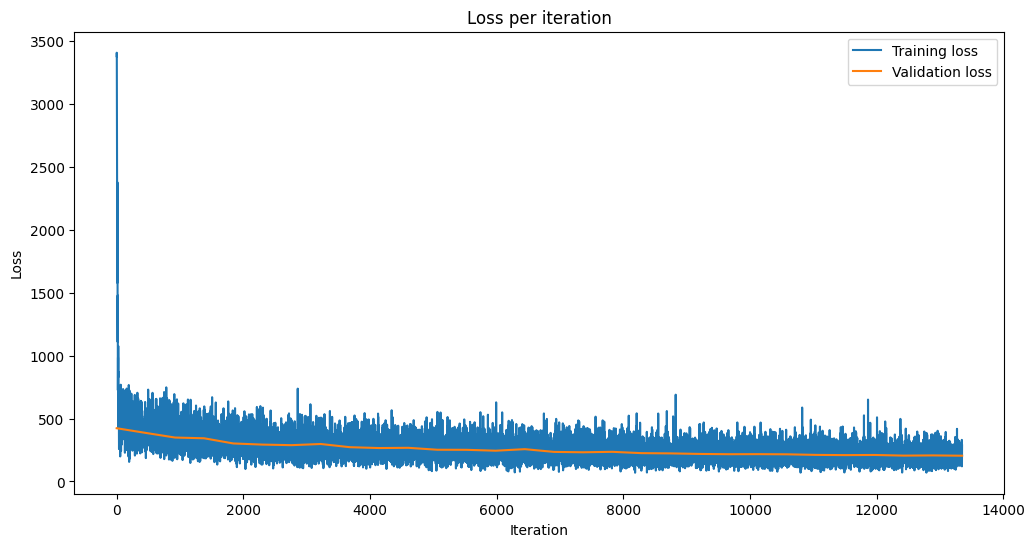

In [5]:
plt.figure(0, figsize = (12,6))
plt.title('Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(train_losses)
plt.plot(np.linspace(0,len(train_losses),epochs), val_losses)
plt.legend(["Training loss","Validation loss"])
print('Final validation loss:',val_losses[-1])

# Train images and CSV features with a multimodal neural network